In [77]:
import scipy.spatial.distance

"""Some important Ptolemaic metric spaces are 4-embeddable into R^3.
Connor mentions a tetrahedron lower bound: When all but one distances
between four points are known, the last one can be lower bounded as the
shortest side of a tetrahedron. This would be a degenerate tetrahedron,
with the two known triangles sharing one side and lying in the same plane.
"""

'Some important Ptolemaic metric spaces are 4-embeddable into R^3.\nConnor mentions a tetrahedron lower bound: When all but one distances\nbetween four points are known, the last one can be lower bounded as the\nshortest side of a tetrahedron. This would be a degenerate tetrahedron,\nwith the two known triangles sharing one side and lying in the same plane.\n'

In [78]:
import numpy as np
from sympy import *
#from algebra_with_sympy import *

init_printing(use_latex='mathjax')

dist_prop = dict(real=True, positive=True)
# generic symbols
A, s, a, b, c, h = symbols("A s a b c h", **dist_prop)

# Heron
semiperimeter = {s: (a + b + c) / 2}
area = sqrt(s * (s - a) * (s - b) * (s - c))

height_over_a = 2 / a * area.subs(semiperimeter)

area, semiperimeter

⎛     ____________________________  ⎧   a   b   c⎫⎞
⎜√s⋅╲╱ (-a + s)⋅(-b + s)⋅(-c + s) , ⎨s: ─ + ─ + ─⎬⎟
⎝                                   ⎩   2   2   2⎭⎠

![](img.png)

In [79]:
# we have two pivots, a query (center) and an object
# we want to lower bound d(q,o)
# we know all other distances

# the two resulting triangles have a shared base p0-p1 of length p
p = symbols("p", **dist_prop)

# the query triangle has these other sides:
q0, q1 = symbols("q:2", **dist_prop)

# dito for the object triangle
o0, o1 = symbols("o:2", **dist_prop)

# these triangles have heights that we can infer via Heron
hq = height_over_a.subs({
    a: p, b: q0, c: q1
})
ho = height_over_a.subs({
    a: p, b: o0, c: o1
})

def simplify_height(h):
    h = simplify(h)
    h = h.subs(h.args[2],
                   (h.args[2]).factor()
               )
    return h

# both formulas are the same!
assert simplify(ho.subs({o1:q1,o0:q0}) == hq)

hq = simplify_height(hq)
ho = simplify_height(ho)
hq

  ____________________________________________   _____________
╲╱ -(p - q₀ - q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁) ⋅╲╱ p + q₀ + q₁ 
──────────────────────────────────────────────────────────────
                             2⋅p                              

In [80]:
# the height "bisects" the shared base at these lengths,
# measured from one of the two possible vertices:
mq0 = sqrt(q0**2 - hq**2)
mo0 = sqrt(o0**2 - ho**2)

mq1 = sqrt(q1**2 - hq**2)
mo1 = sqrt(o1**2 - ho**2)

mq0, mo0

⎛     _______________________________________________________________       _________________________________________________________________⎞
⎜    ╱   2   (p - q₀ - q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁)⋅(p + q₀ + q₁)       ╱   2   (-o₀ - o₁ + p)⋅(-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ + p) ⎟
⎜   ╱  q₀  + ─────────────────────────────────────────────────────── ,    ╱  o₀  + ───────────────────────────────────────────────────────── ⎟
⎜  ╱                                      2                              ╱                                       2                           ⎟
⎝╲╱                                    4⋅p                             ╲╱                                     4⋅p                            ⎠

In [81]:
# We know the height of the triangle w.r.t. q.
# Let's figure out the "width" or the "x-position" of the point q.

# Let q0 be on the left and q1 be on the right.
# If the triangle is acute:
m_ac = mq0

# If the triangle is obtuse, we have two cases:
# One where the point is to the left:
mob_left = -mq0
# And one where the point is to the right:
mob_right = mq0 # which is identical to m_ac

# left obtuse means that q1 has to be the longest side and
# that q1**2 > p**2 + q1**2
mq = Piecewise(
    (mob_left,  q1**2 > p**2 + q0**2), # And(And(q1 > p, q1 > q0) ,
    (m_ac, True)
)

mo = mq.subs({mq0:mo0, q0:o0, q1:o1})
mo

⎧      _________________________________________________________________                    
⎪     ╱   2   (-o₀ - o₁ + p)⋅(-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ + p)         2     2    2
⎪-   ╱  o₀  + ─────────────────────────────────────────────────────────   for o₁  > o₀  + p 
⎪   ╱                                       2                                               
⎪ ╲╱                                     4⋅p                                                
⎨                                                                                           
⎪     _________________________________________________________________                     
⎪    ╱   2   (-o₀ - o₁ + p)⋅(-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ + p)                      
⎪   ╱  o₀  + ─────────────────────────────────────────────────────────        otherwise     
⎪  ╱                                       2                                                
⎩╲╱                                     4⋅p                           

In [168]:
print_python(from_maca("(p^2 + o0^2 - o1^2)/(2 p)", free_symbols))

o0 = Symbol('o0')
o1 = Symbol('o1')
p = Symbol('p')
e = (o0**2 - o1**2 + p**2)/(2*p)


In [141]:
# construct the right triangle which hypotenuse of length d connects q and o
# from h and m s

dist = (hq - ho) ** 2 + (mq - mo) ** 2 # = d**2
dist = sqrt(dist)
dist = simplify(dist)
dist

⎧     ___________________________________________________________________________________________________________________________________________________________________________________________________________
⎪    ╱                                                                                                                                                                                                           
⎪   ╱                                                                                                                                   2   ⎛   _________________________________________________________________
⎪  ╱   ⎛  ____________________________________________   _____________     ____________________________________________   _____________⎞    ⎜  ╱     2  2                                                        
⎪╲╱    ⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p) ⋅╲╱ o₀ + o₁ + p  - ╲╱ (-p + q₀ + q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁) ⋅╲╱ p + q₀ + q₁ ⎠  + ⎝╲╱  4⋅o₀ ⋅p  - (-o₀

In [148]:
# we can also find an upper bound this way:
# arrange the triangles so that one height is positive and one is negative:
dist_ub = (hq + ho)**2 + (mq - mo)**2
dist_ub = simplify(sqrt(dist_ub))
dist_ub

⎧     ___________________________________________________________________________________________________________________________________________________________________________________________________________
⎪    ╱                                                                                                                                                                                                           
⎪   ╱                                                                                                                                   2   ⎛   _________________________________________________________________
⎪  ╱   ⎛  ____________________________________________   _____________     ____________________________________________   _____________⎞    ⎜  ╱     2  2                                                        
⎪╲╱    ⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p) ⋅╲╱ o₀ + o₁ + p  + ╲╱ (-p + q₀ + q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁) ⋅╲╱ p + q₀ + q₁ ⎠  + ⎝╲╱  4⋅o₀ ⋅p  - (-o₀

In [149]:
# TODO: refactor me
def piecewise_to_maca(term:Piecewise, pretty=False):
    """Return Mathematica code for Piecewise objects.
    
    mathematica_code(term) cannot handle Piecewise objects.
    """
    pieces = []

    def to_maca(term):
        return mathematica_code(term)

    for term, condition in term.args:
        pieces.append(
            "{" + to_maca(term) + "," + to_maca(condition) + "}"
        )
    
    if not pretty:
        args = ",".join(pieces)
    else:
        args = ",\n".join(pieces)
        args = "\n" + args + "\n"
        
    return "Piecewise[{"+args+"}]"

In [153]:
print(piecewise_to_maca(dist_ub, True))

Piecewise[{
{(1/2)*((((-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p))^(1/2)*(o0 + o1 + p)^(1/2) + ((-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1))^(1/2)*(p + q0 + q1)^(1/2))^2 + ((4*o0^2*p^2 - (-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p)*(o0 + o1 + p))^(1/2) - (4*p^2*q0^2 - (-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1)*(p + q0 + q1))^(1/2))^2)^(1/2)/p,o1^2 > o0^2 + p^2 && q1^2 > p^2 + q0^2},
{(1/2)*((((-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p))^(1/2)*(o0 + o1 + p)^(1/2) + ((-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1))^(1/2)*(p + q0 + q1)^(1/2))^2 + ((4*o0^2*p^2 - (-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p)*(o0 + o1 + p))^(1/2) + (4*p^2*q0^2 - (-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1)*(p + q0 + q1))^(1/2))^2)^(1/2)/p,o1^2 > o0^2 + p^2 || q1^2 > p^2 + q0^2},
{(1/2)*((((-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p))^(1/2)*(o0 + o1 + p)^(1/2) + ((-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1))^(1/2)*(p + q0 + q1)^(1/2))^2 + ((4*o0^2*p^2 - (-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p)*(o0 + o1 + p))^(1/2) - (4*p^2*q0

             ____________________________________________________________________________________________________________________________________________________________________________________________________
            ╱                                                                                                                                                                                                    
           ╱                                                                                                                                         ⎛  ⎛⎧      _________________________________________________
          ╱                                                                                                                                          ⎜  ⎜⎪     ╱   2   (-o₀ - o₁ + p)⋅(-o₀ + o₁ + p)⋅(o₀ - o₁ + p
         ╱                                                                                                                                       2   ⎜  ⎜⎪-   ╱ 

In [61]:
print(piecewise_to_maca(dist_ub, True))

Piecewise[{
{(1/2)*((((-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p))^(1/2)*(o0 + o1 + p)^(1/2) - ((-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1))^(1/2)*(p + q0 + q1)^(1/2))^2 + ((4*o0^2*p^2 - (-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p)*(o0 + o1 + p))^(1/2) - (4*p^2*q0^2 - (-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1)*(p + q0 + q1))^(1/2))^2)^(1/2)/p,o1^2 > o0^2 + p^2 && q1^2 > p^2 + q0^2},
{(1/2)*((((-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p))^(1/2)*(o0 + o1 + p)^(1/2) - ((-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1))^(1/2)*(p + q0 + q1)^(1/2))^2 + ((4*o0^2*p^2 - (-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p)*(o0 + o1 + p))^(1/2) + (4*p^2*q0^2 - (-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1)*(p + q0 + q1))^(1/2))^2)^(1/2)/p,o1^2 > o0^2 + p^2 || q1^2 > p^2 + q0^2},
{(1/2)*((((-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p))^(1/2)*(o0 + o1 + p)^(1/2) - ((-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1))^(1/2)*(p + q0 + q1)^(1/2))^2 + ((4*o0^2*p^2 - (-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p)*(o0 + o1 + p))^(1/2) - (4*p^2*q0

In [14]:

# geometrically, we know that
# mq0 + mo0 == mo1 + mq1


In [110]:
str(q0)

'q0'

In [162]:
from sympy.parsing.mathematica import parse_mathematica

def from_maca(string, free_symbols):
    term = parse_mathematica(string)
    # symbols don't get matched automatically
    for s in free_symbols:
        term = term.replace(symbols(str(s)),s)
    return term

string = "((o0^2-o1^2-q0^2+q1^2)^2+(Sqrt[-((o0-o1-p) (o0+o1-p) (o0-o1+p) (o0+o1+p))]-Sqrt[-((p-q0-q1) (p+q0-q1) (p-q0+q1) (p+q0+q1))])^2)/(4 p^2)"
free_symbols = [p,q0, q1, o0, o1]
mdist = from_maca(string, free_symbols)
mdist = sqrt(mdist)

mdist

    _______________________________________________________________________________________________________________________________________________________________
   ╱                                                                                                                                  2                          2 
  ╱  ⎛  ____________________________________________   _____________     ____________________________________________   _____________⎞    ⎛  2     2     2     2⎞  
╲╱   ⎝╲╱ -(o₀ - o₁ - p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p) ⋅╲╱ o₀ + o₁ + p  - ╲╱ -(p - q₀ - q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁) ⋅╲╱ p + q₀ + q₁ ⎠  + ⎝o₀  - o₁  - q₀  + q₁ ⎠  
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                2⋅p                                                                                

In [163]:
print_python(mdist)

o0 = Symbol('o0')
o1 = Symbol('o1')
p = Symbol('p')
q0 = Symbol('q0')
q1 = Symbol('q1')
e = sqrt((sqrt(-(o0 - o1 - p)*(o0 - o1 + p)*(o0 + o1 - p))*sqrt(o0 + o1 + p) - sqrt(-(p - q0 - q1)*(p - q0 + q1)*(p + q0 - q1))*sqrt(p + q0 + q1))**2 + (o0**2 - o1**2 - q0**2 + q1**2)**2)/(2*p)


In [165]:
mdist_ub = sqrt(from_maca(
"""Sqrt[o0^2 p^2 + p^2 q0^2 + 
 1/2 Sqrt[(o0 + o1 - p) (o0 - o1 + p) (-o0 + o1 + p) (o0 + o1 + p)]
   Sqrt[(p + q0 - q1) (p - q0 + q1) (-p + q0 + q1) (p + q0 + q1)] - 
 1/2 (o0^2 - o1^2 + p^2) (p^2 + q0^2 - q1^2)]/p""",
    free_symbols
))
print_python(mdist_ub)

o0 = Symbol('o0')
p = Symbol('p')
q0 = Symbol('q0')
o1 = Symbol('o1')
q1 = Symbol('q1')
e = (o0**2*p**2 + p**2*q0**2 + sqrt((-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p))*sqrt((-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1))*sqrt(o0 + o1 + p)*sqrt(p + q0 + q1)/2 - (o0**2 - o1**2 + p**2)*(p**2 + q0**2 - q1**2)/2)**Rational(1, 4)/sqrt(p)


In [122]:
# test with a simple triangle:
tri0 = {
    p:3,
    q0:7,
    q1:5,
}
tri1 = {
    p:tri0[p],
    o0:10.77,
    o1:12.21,
}

height0 = 4.33
m_base0 = 5.5
precision = 0.02

assert N(abs(hq.subs(tri0) - height0)) < precision, "wrong height!"
assert N(abs(mq0.subs(tri0) - m_base0)) < precision, "wrong intersect!"

dist_n = float(mdist.subs(tri0).subs(tri1))
assert np.allclose(dist_n, 11.06, atol=precision), dist_n

In [123]:
# test with a "hard" triangle
trih = {
    p:32.44996148,
    q0:65.76473219,
    q1:38.83297568,
    o0:64.5368112 ,
    o1:36.22154055,
}

assert np.abs(hq.subs(trih) - 27.74) < precision
assert np.abs(ho.subs(trih) - 23.3) < precision
mq0.subs(trih) - 32.45, mo0.subs(trih) - 32.45

assert np.allclose(float(mdist.subs(trih)), 4.47, atol=precision)

In [140]:
# numerical test simplify(dist - mdist)
is_equal = lambdify(free_symbols, simplify(dist - mdist), "numpy")

results = abs(is_equal(*np.random.rand(len(free_symbols),10000)))
assert all(results[~np.isnan(results)] < 0.001)

<lambdifygenerated-15>:2: RuntimeWarning: invalid value encountered in sqrt
  return select([logical_and.reduce((greater(o1**2, o0**2 + p**2),greater(q1**2, p**2 + q0**2))),logical_or.reduce((greater(o1**2, o0**2 + p**2),greater(q1**2, p**2 + q0**2))),True], [(1/2)*(sqrt((sqrt((-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p))*sqrt(o0 + o1 + p) - sqrt((-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1))*sqrt(p + q0 + q1))**2 + (sqrt(4*o0**2*p**2 - (-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p)*(o0 + o1 + p)) - sqrt(4*p**2*q0**2 - (-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1)*(p + q0 + q1)))**2) - sqrt((sqrt((-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p))*sqrt(o0 + o1 + p) - sqrt((-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1))*sqrt(p + q0 + q1))**2 + (o0**2 - o1**2 - q0**2 + q1**2)**2))/p,(1/2)*(sqrt((sqrt((-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p))*sqrt(o0 + o1 + p) - sqrt((-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1))*sqrt(p + q0 + q1))**2 + (sqrt(4*o0**2*p**2 - (-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p)*(o0 + o1 + p)

In [133]:
simplify(dist - mdist).subs(tri1).subs(tri0)

                      __________________________________________________________________                       _________________________________________________
                     ╱                                            2                                           ╱                           2                     
- 13.6818666666667⋅╲╱  0.53351789479596⋅(1 - 0.250161319810253⋅√3)  + 0.483665527367826  + 9.99355136875775⋅╲╱  (1 - 0.250161319810253⋅√3)  + 0.906559146535845 

In [ ]:
hq.subs(trih)

In [ ]:
mo.subs(trih)

In [ ]:
# from Connor's paper:
# 1/d(p0,p1) * (d(q, p0)**2 + d(q, p0)**2) > 2*t
# is a lower bound
lb = 1/2/p * (q0**2 + q1**2)
N(lb.subs(tri0)), N(dist_n)

In [ ]:
simplify(dist < lb)


In [ ]:
nsolveset(dist - 3,o0, domain=S.Reals)

In [ ]:
printing.print_python(dist_ub)

In [ ]:
printing.print_maple_code(dist)

In [157]:
#connor_diff = lambdify([p,q0, q1, o0, o1], lb - dist, "numpy")
tetrahedron_lb = lambdify([p,q0, q1, o0, o1], mdist, "numpy")
tetrahedron_ub = lambdify([p,q0, q1, o0, o1], dist_ub, "numpy")

def ptolemy_lb(p, q0, q1, o0, o1):
    diff = np.abs(q0 * o1 - q1 * o0)
    return diff / p

In [158]:
from tqdm import tqdm

def _stable_tetrahedron_lb(p_n, q0_n, q1_n, o0_n, o1_n):
    for i in tqdm(range(len(p_n))):
        yield dist.subs({
            p:p_n[i],
            q0:q0_n[i],
            q1:q1_n[i],
            o0:o0_n[i],
            o1:o1_n[i],
        }).evalf()

def stable_tetrahedron_lb(p_n, q0_n, q1_n, o0_n, o1_n):
    return np.asarray(list(_stable_tetrahedron_lb(p_n, q0_n, q1_n, o0_n, o1_n)), dtype=float)

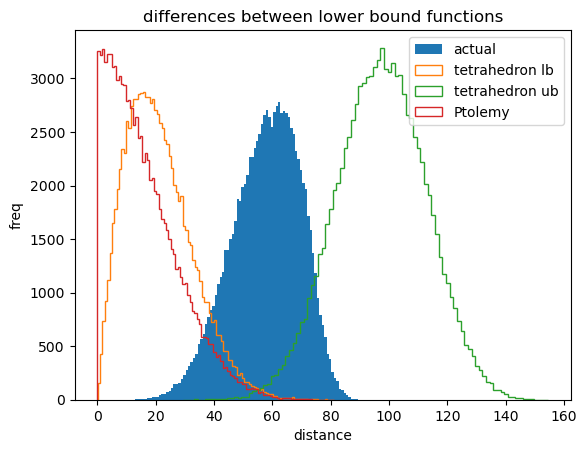

In [161]:
# simulate triangles
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
rng = np.random.default_rng()

dist_func = lambda x,y: spatial.minkowski_distance(x,y,5)# np.linalg.norm(x-y, axis=-1)
n_samples= 100000
dim = 8
points = rng.integers(-37,38, size=[n_samples, 4, dim])
p0,p1,q,o = 0,1,2,3
dists_p = dist_func(points[:,p0,:], points[:,p1,:])
dists_q0 = dist_func(points[:,p0,:], points[:,q,:])
dists_q1 = dist_func(points[:,p1,:], points[:,q,:])
dists_o0 = dist_func(points[:,p0,:], points[:,o,:])
dists_o1 = dist_func(points[:,p1,:], points[:,o,:])
dists_target = dist_func(points[:,q,:], points[:,o,:])

args = np.vstack((dists_p, dists_q0, dists_q1, dists_o0, dists_o1))
tet_lb = tetrahedron_lb(*args)
tet_ub = tetrahedron_ub(*args)
pto_n = ptolemy_lb(*args)
#connors_lb_n = connor_lb(*args)
#connors_lb_n = np.clip(connors_lb_n, -10, 200)

bins = 100
plt.hist(dists_target,  bins=bins, label="actual")
plt.hist(tet_lb, bins=bins, histtype="step", label="tetrahedron lb")
plt.hist(tet_ub, bins=bins, histtype="step", label="tetrahedron ub")
plt.hist(pto_n, bins=bins, histtype="step", label="Ptolemy")
#plt.hist(connors_lb_n, bins=bins, histtype="step", label="connor")

plt.title("differences between lower bound functions")
plt.xlabel("distance")
plt.ylabel("freq")
plt.legend()
plt.show()

In [ ]:
def violations(lb):
    return (dists_target < lb).sum() / len(dists_target)
violations_tet = violations(tet_lb)
violations_pto = violations(pto_n)
violations_tet, violations_pto

In [ ]:
plt.hist(pto_n - tet_lb, bins=100);

In [ ]:
plt.hist(dists_target - tet_lb, histtype="step", bins=100);
#plt.hist(tet_ub - dists_target, histtype="step");

In [ ]:
problems = np.abs(dists_target - my_lb_n) > 0.01
ppoints = points[problems,:,:]

plt.plot(*ppoints[0][:2].T)
for p in ppoints[0]:
    plt.plot(*p, "o")
    
plt.show()